## Data Analysis of Netflix Movies and TV Shows

1. Understanding what content is available in different countries.
2. Identifying similar content by matching text-based features.
3. Network Analysis of Actors/Directors and find interesting insights.
4. Does Netflix have an increasing focus on TV rather than movies in recent years?

In [43]:
import pandas as pd
%matplotlib inline
pd.__version__

'0.20.1'

### Read Data

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

In [6]:
# Inspecting the first five rows
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


##### Summary of Dataset

In [87]:
print('Rows     :', netflix.shape[0])
print('Columns  :', netflix.shape[1])
print('\nFeatures :\n     :', netflix.columns.tolist())
print('\nMissing values    :', netflix.isnull().values.sum())
print('\nUnique values :\n  ', netflix.nunique())

Rows     : 6234
Columns  : 15

Features :
     : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'month_added', 'day_added', 'year_added']

Missing values    : 3069

Unique values :
   show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1189
release_year      72
rating            14
duration         201
listed_in        461
description     6226
month_added       12
day_added         31
year_added        13
dtype: int64


##### Expanding 'date_added' column with appropriate data type

In [41]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['month_added'] = netflix['date_added'].dt.month
netflix['day_added'] = netflix['date_added'].dt.day
netflix['year_added'] =netflix['date_added'].dt.year
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9.0,9.0,2019.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9.0,9.0,2016.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9.0,8.0,2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9.0,8.0,2018.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9.0,8.0,2017.0


**How many rows would remain if we dropped the rows with any missing data?**

In [16]:
netflix.dropna(how='any').shape

(3774, 12)

**What percentage of data is missing?**

In [84]:
print(round(netflix.isnull().values.sum() / netflix.shape[0] * 100, 1), '%')

49.2 %


##### What types do we have?

In [20]:
netflix.type.value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

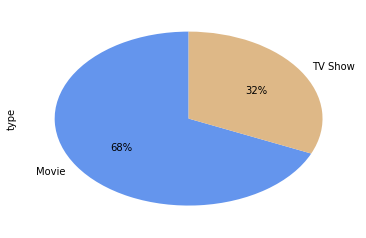

In [77]:
netflix.type.value_counts().plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['cornflowerblue','burlywood'])

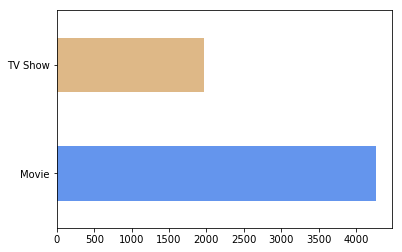

In [79]:
netflix.type.value_counts().plot(kind='barh', color=['cornflowerblue','burlywood'])

##### What ratings do we have?

In [80]:
netflix.rating.value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

**Separate the ratings for movies and TV**

In [90]:
netflix.rating.str.contains('TV-')

0        True
1        True
2        True
3        True
4        True
5        True
6       False
7        True
8        True
9       False
10       True
11      False
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21      False
22       True
23      False
24      False
25      False
26       True
27       True
28       True
29       True
        ...  
6204     True
6205     True
6206     True
6207     True
6208     True
6209     True
6210     True
6211     True
6212     True
6213     True
6214     True
6215     True
6216     True
6217     True
6218     True
6219     True
6220     True
6221     True
6222     True
6223     True
6224     True
6225     True
6226     True
6227     True
6228     True
6229    False
6230     True
6231      NaN
6232     True
6233     True
Name: rating, Length: 6234, dtype: object

**The following is an inaccurate listing of countries.**
For example, "United Kingdom, United States" = 50. This entry, found 50 times, should be adding 50 to the count of 'United States' and 50 to the count of 'United Kingdom'. Every time 'United States' is found it should be added to the count for 'United States'. 

In [91]:
netflix.groupby('country')['show_id'].count().sort_values(ascending=False)

country
United States                                                        2032
India                                                                 777
United Kingdom                                                        348
Japan                                                                 176
Canada                                                                141
South Korea                                                           136
Spain                                                                 117
France                                                                 90
Mexico                                                                 83
Turkey                                                                 79
Australia                                                              71
Taiwan                                                                 69
Hong Kong                                                              51
Brazil                        